# **Proyecto de Inteligencia Artifical**

---
Laura Sofía Gómez Lizarazo\
Dataset: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset



In [1]:
# Librerias
import numpy as np
import pandas as pd
from sklearn import preprocessing, linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, matthews_corrcoef
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.metrics import make_scorer
import matplotlib.pyplot as mp
import seaborn as sb

**Lectura de datos**

In [2]:
datos = pd.read_csv('Datos.csv')

**Revisión de datos nulos**

In [3]:
datos = datos.drop(["id","ever_married","work_type","Residence_type"], axis=1)

In [4]:
datos.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**Limpieza de datos a partir de la media**

In [5]:
Datos=datos.fillna(datos.mean())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [6]:
# VALIDACIÓN DE LA LIMPIEZA DE DATOS
Datos.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   avg_glucose_level  5110 non-null   float64
 5   bmi                5110 non-null   float64
 6   smoking_status     5110 non-null   object 
 7   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 319.5+ KB


In [8]:

#CONVERSIÓN DE DATOS STRING A NUMÉRICOS 
lc = preprocessing.LabelEncoder()
columnas=["gender","smoking_status"]
for c in columnas:
  Datos[c]=lc.fit_transform(Datos[c])

In [9]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   avg_glucose_level  5110 non-null   float64
 5   bmi                5110 non-null   float64
 6   smoking_status     5110 non-null   int64  
 7   stroke             5110 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 319.5 KB


**CSV con los datos limpios**

In [10]:
# Creación del dataset con los datos limpios
Datos.to_csv("New_data.csv",index=False)

**X y Y**

In [11]:

y = Datos.stroke
X = Datos.drop(["stroke"], axis=1)

**Tamaño de datos entrenanmiento y validación**

In [12]:
# Método Hold-out
train_size = 0.75
test_size  = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

**Normalización de los datos**

In [13]:
# Normalizacion
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **PCA**

In [14]:
PCA = decomposition.PCA(n_components=7)
PCA.fit(X_train)
X_train = PCA.transform(X_train)

print("Pesos en PCA:",PCA.explained_variance_ratio_)
print("Suma total de los pesos PCA",sum(PCA.explained_variance_ratio_))

Pesos en PCA: [0.27329092 0.16412965 0.1280735  0.12783192 0.11744957 0.10674401
 0.08248043]
Suma total de los pesos PCA 1.0


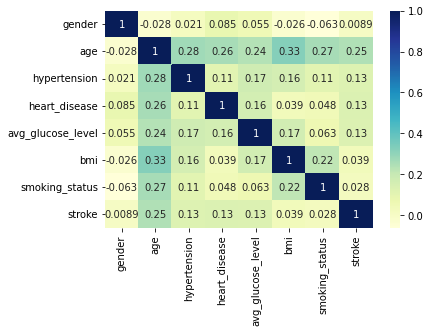

In [15]:
dataplot = sb.heatmap(Datos.corr(), cmap="YlGnBu", annot=True)

In [16]:

pg=[{"kernel":["linear","poly","rbf"]}]
scoring = {"AUC": "roc_auc", "f1": make_scorer(f1_score) }
G_S = GridSearchCV(estimator=SVC(),param_grid=pg, scoring = scoring, refit="AUC",return_train_score=True)
G_S.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'kernel': ['linear', 'poly', 'rbf']}], refit='AUC',
             return_train_score=True,
             scoring={'AUC': 'roc_auc', 'f1': make_scorer(f1_score)})

In [17]:
G_S.best_score_

0.7017660567848946

In [18]:
G_S.cv_results_['mean_test_AUC'] 

array([0.67083151, 0.70176606, 0.57168814])

In [19]:
G_S.cv_results_['mean_test_f1'] 

array([0., 0., 0.])

# **SVM**

In [21]:
pg =[{'kernel':["linear","poly","rbf"],'gamma':["scale","auto"],'C':[0.1,5,10,25.5,50,80,100]}]
scoring = {"AUC": "roc_auc", "f1": make_scorer(f1_score)}
G_S_SVM=GridSearchCV(estimator=SVC(),param_grid= pg, scoring=scoring,refit="AUC")
G_S_SVM.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 5, 10, 25.5, 50, 80, 100],
                          'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'poly', 'rbf']}],
             refit='AUC',
             scoring={'AUC': 'roc_auc', 'f1': make_scorer(f1_score)})

In [22]:
G_S_SVM.cv_results_

{'mean_fit_time': array([2.63170719e-02, 1.72401428e-01, 8.00020695e-02, 2.38586903e-02,
        1.62280369e-01, 8.05801868e-02, 3.71900558e-02, 2.76880488e+00,
        1.83519125e-01, 3.77166748e-02, 2.78609691e+00, 1.86413240e-01,
        4.72197533e-02, 5.49903235e+00, 2.09889174e-01, 4.71646309e-02,
        5.81378455e+00, 2.06071615e-01, 7.42242336e-02, 1.70440705e+01,
        2.44400787e-01, 7.30933666e-02, 1.58473701e+01, 2.35000420e-01,
        1.98451309e+00, 3.45307048e+01, 2.66213799e-01, 1.99228992e+00,
        3.46318539e+01, 2.77365065e-01, 3.69692186e+01, 5.95541984e+01,
        3.01670551e-01, 3.69326044e+01, 7.27133356e+01, 3.07111263e-01,
        8.23356199e+01, 8.73608716e+01, 3.21600723e-01, 8.23658804e+01,
        8.78252004e+01, 3.22078609e-01]),
 'std_fit_time': array([2.95746613e-03, 8.43658614e-02, 2.54521245e-03, 3.53505330e-04,
        8.38514993e-02, 5.43542219e-03, 1.09380160e-03, 2.18248210e+00,
        1.85714922e-02, 1.36070372e-03, 2.17652116e+00, 1.889

In [23]:
G_S_SVM.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [24]:
G_S_SVM.best_score_

0.7249953439248363

In [25]:
G_S_SVM.cv_results_['mean_test_AUC'] 

array([0.72499534, 0.66757912, 0.62290126, 0.72499534, 0.68552306,
       0.61737969, 0.60054986, 0.71586584, 0.57155518, 0.60054986,
       0.71774609, 0.56928645, 0.60933523, 0.71615423, 0.57443636,
       0.60933523, 0.71013258, 0.57348895, 0.67527076, 0.708794  ,
       0.58116792, 0.67527076, 0.71368685, 0.58103773, 0.57671502,
       0.70539322, 0.5854412 , 0.57671502, 0.69159467, 0.58545303,
       0.56664256, 0.68927337, 0.60002402, 0.56664256, 0.69266413,
       0.60049146, 0.56901276, 0.69353771, 0.60575298, 0.56901276,
       0.69610966, 0.6060824 ])

In [26]:
G_S_SVM.cv_results_['mean_test_f1'] 

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02081081,
       0.        , 0.        , 0.02081081, 0.        , 0.        ,
       0.02005013, 0.        , 0.        , 0.02005013, 0.        ,
       0.        , 0.02802283, 0.        , 0.        , 0.02802283,
       0.        , 0.        , 0.04375758, 0.        , 0.        ,
       0.04375758, 0.        , 0.        , 0.05248019, 0.        ,
       0.        , 0.05248019])

# **Regresión logística**

In [237]:
grid = { 
   # 'penalty': ["l2","none"],
    'C' : np.arange(0.001,0.03,0.001),
    #'solver' : ["newton-cg", "lbfgs", "sag", "saga"],
}
scoring = {"AUC": "roc_auc", "f1": make_scorer(f1_score)}

G_S_LR = GridSearchCV(estimator= LogisticRegression(), param_grid=grid, cv= 5,scoring=scoring,refit="AUC")
G_S_LR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029])},
             refit='AUC',
             scoring={'AUC': 'roc_auc', 'f1': make_scorer(f1_score)})

In [238]:
G_S_LR.best_params_

{'C': 0.029}

In [239]:
G_S_LR.best_score_

0.837600425490289

In [240]:
G_S_LR.cv_results_['mean_test_AUC'] 

array([0.81963887, 0.82265387, 0.82517373, 0.82723319, 0.82898367,
       0.83012401, 0.83141698, 0.83245314, 0.83308015, 0.83349721,
       0.83405518, 0.83453207, 0.83495103, 0.83536228, 0.83566369,
       0.83583336, 0.83609857, 0.83640708, 0.83666426, 0.83673064,
       0.83673936, 0.83681422, 0.83704217, 0.83701387, 0.8372321 ,
       0.83731905, 0.83732095, 0.83742462, 0.83760043])

In [241]:
G_S_LR.cv_results_['mean_test_f1'] 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# **KNN**

In [243]:
from sklearn.neighbors import KNeighborsClassifier

scoring = {"AUC": "roc_auc", "f1": make_scorer(f1_score)}

pg=[{'n_neighbors':[1,2,5,10,25,50,80],'algorithm':["auto","ball_tree","kd_tree","brute"],'weights':["uniform","distance"]}]
G_S_k=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=pg, scoring=scoring,refit="AUC")
G_S_k.fit(X_train,y_train)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'n_neighbors': [1, 2, 5, 10, 25, 50, 80],
                          'weights': ['uniform', 'distance']}],
             refit='AUC',
             scoring={'AUC': 'roc_auc', 'f1': make_scorer(f1_score)})

In [244]:
G_S_k.best_params_

{'algorithm': 'auto', 'n_neighbors': 50, 'weights': 'uniform'}

In [245]:
G_S_k.best_score_

0.8091997710175098

In [246]:
G_S_k.cv_results_['mean_test_AUC'] 

array([0.52760562, 0.52760562, 0.56523318, 0.56507457, 0.62600452,
       0.6255411 , 0.71344893, 0.70863992, 0.79276095, 0.78619002,
       0.80919977, 0.80481029, 0.80864477, 0.80764015, 0.52760562,
       0.52760562, 0.56523318, 0.56507457, 0.62600452, 0.6255411 ,
       0.71344893, 0.70863992, 0.79276095, 0.78619002, 0.80919977,
       0.80481029, 0.80864477, 0.80764015, 0.52760562, 0.52760562,
       0.56523318, 0.56507457, 0.62600452, 0.6255411 , 0.71344893,
       0.70863992, 0.79276095, 0.78619002, 0.80919977, 0.80481029,
       0.80864477, 0.80764015, 0.52760562, 0.52760562, 0.56523318,
       0.56507457, 0.62600452, 0.6255411 , 0.71344893, 0.70863992,
       0.79276095, 0.78619002, 0.80919977, 0.80481029, 0.80864477,
       0.80764015])

In [247]:
G_S_k.cv_results_['mean_test_f1'] 

array([0.0977839 , 0.0977839 , 0.01864499, 0.0977839 , 0.01882614,
       0.04708114, 0.        , 0.01      , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0977839 ,
       0.0977839 , 0.01864499, 0.0977839 , 0.01882614, 0.04708114,
       0.        , 0.01      , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.0977839 , 0.0977839 ,
       0.01864499, 0.0977839 , 0.01882614, 0.04708114, 0.        ,
       0.01      , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0977839 , 0.0977839 , 0.01864499,
       0.0977839 , 0.01882614, 0.04708114, 0.        , 0.01      ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])